In [3]:
%matplotlib inline
from netCDF4 import Dataset, num2date, date2num
import numpy as np
import xarray as xr
import matplotlib.image as img
import matplotlib.pyplot as plt

from pylab import rcParams
rcParams['figure.figsize'] = (8,8)   # increase plot size a bit...
rcParams['axes.formatter.useoffset'] = False   # disable scalar formatter / offset in axes labels

Satellite flags are:
[u'LANDSAT_7' u'LANDSAT_8' u'LANDSAT_7' u'LANDSAT_7' u'LANDSAT_7'
 u'LANDSAT_8' u'LANDSAT_7' u'LANDSAT_7' u'LANDSAT_8' u'LANDSAT_8'
 u'LANDSAT_7' u'LANDSAT_7' u'LANDSAT_8' u'LANDSAT_7' u'LANDSAT_7'
 u'LANDSAT_7' u'LANDSAT_7' u'LANDSAT_8' u'LANDSAT_8' u'LANDSAT_7'
 u'LANDSAT_8' u'LANDSAT_8' u'LANDSAT_7' u'LANDSAT_8' u'LANDSAT_7'
 u'LANDSAT_7' u'LANDSAT_8' u'LANDSAT_8' u'LANDSAT_7' u'LANDSAT_7'
 u'LANDSAT_7' u'LANDSAT_7' u'LANDSAT_7' u'LANDSAT_8' u'LANDSAT_8'
 u'LANDSAT_7' u'LANDSAT_7' u'LANDSAT_8' u'LANDSAT_7' u'LANDSAT_7'
 u'LANDSAT_8' u'LANDSAT_8' u'LANDSAT_8' u'LANDSAT_7' u'LANDSAT_8'
 u'LANDSAT_7' u'LANDSAT_7' u'LANDSAT_7' u'LANDSAT_7' u'LANDSAT_8'
 u'LANDSAT_7' u'LANDSAT_8' u'LANDSAT_8' u'LANDSAT_7' u'LANDSAT_8'
 u'LANDSAT_8' u'LANDSAT_8' u'LANDSAT_8' u'LANDSAT_8' u'LANDSAT_7'
 u'LANDSAT_7' u'LANDSAT_7' u'LANDSAT_7' u'LANDSAT_7' u'LANDSAT_8'
 u'LANDSAT_8' u'LANDSAT_8' u'LANDSAT_7' u'LANDSAT_7' u'LANDSAT_7'
 u'LANDSAT_7' u'LANDSAT_7']


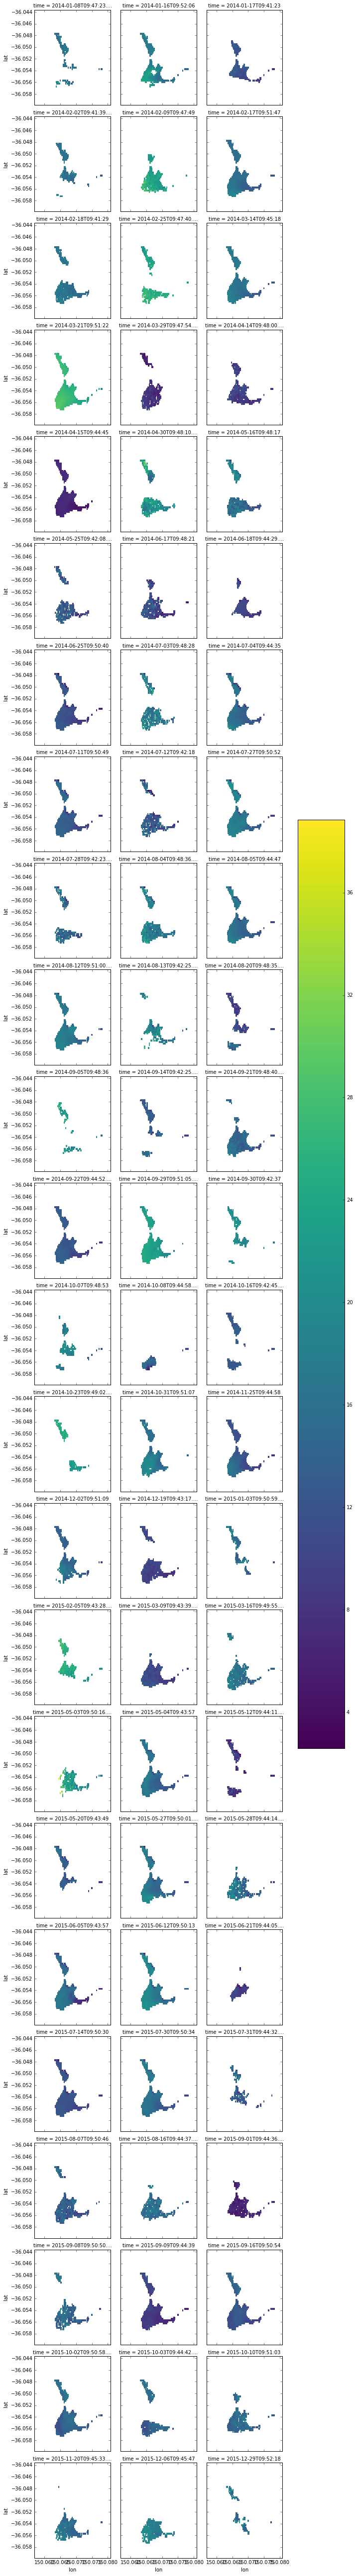

In [13]:
# roi_save_name = '/g/data/jr4/vis_data_v2.0/HUNGERFORD.nc'
# roi_save_name = '/g/data/jr4/vis_data_v2.0/ULAH.nc'
# roi_save_name = '/g/data/jr4/vis_data_v2.0/EIGHT_MILE.nc'
# roi_save_name = '/g/data/jr4/vis_data_v2.0/BROADMEADOWS.nc'

# roi_save_name = '/g/data/jr4/vis_data_v3.0/TELEPHONE.nc'
roi_save_name = '/g/data/jr4/vis_data_v3.0/TRUNKETABELLA.nc'
# roi_save_name = '/g/data/jr4/vis_data_v3.0/CORINYA.nc'
# roi_save_name = '/g/data/jr4/vis_data_v3.0/HUNGERFORD.nc'
# roi_save_name = '/g/data/jr4/vis_data_v3.0/BROADMEADOWS.nc'

roi_nc_grp = Dataset(roi_save_name, mode='a')

dat = roi_nc_grp.variables['WQ_data']
times = roi_nc_grp.variables['time']
lats = roi_nc_grp.variables['lat']
lons = roi_nc_grp.variables['lon']

times = num2date( list(times), times.units, times.calendar )   # datetime.datetime object

WQ_xarray_TS_geo = xr.DataArray( np.array(dat), coords=[ ('time', times), ('lat', lats), ('lon', lons) ] )
WQ_xarray_TS_geo.plot(col='time',col_wrap=3);

print( "Satellite flags are:" )
print( roi_nc_grp.variables['satellite_flags'][:] )

roi_nc_grp.close()